# Part I - (Ford Gobike System Data)
## by (Akachukwu Ordu)

## Introduction

## Preliminary Wrangling
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


In [2]:
# suppress warnings from final output
import warnings
warnings.filterwarnings('ignore')

# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import calendar

# Gathering Data

In [3]:
# load in the dataset into a pandas dataframe.
gb = pd.read_csv('201902-fordgobike-tripdata.csv')

# Assessing Data

In [4]:
#executing top 5 rows
gb.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
## high-level overview of data shape and composition
print(gb.shape)
print(gb.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [6]:
gb.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
gb.info()

gb.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
#checking for any duplicated rows 
gb.duplicated().sum()

0

# Cleaning Data

In [9]:
# copy of data frame 
fgb = gb

In [10]:
# elemenate the NAN Values 
fgb = fgb.dropna()
# Testing 
fgb.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [11]:
# changing the birth_year to int 
fgb.member_birth_year = fgb.member_birth_year.astype(int)

In [12]:
# changing the start_time and end_time to date instead of integer 
fgb.start_time = pd.to_datetime(fgb.start_time)

fgb.end_time = pd.to_datetime(fgb.end_time)

In [13]:
#testing of previous changes 
fgb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

### What is the structure of your dataset?

This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The Ford Gobike System Dataset contains 183412 row and 16 columns which had to undergo data wrangling processes, which eleminated Null values from the data set. having our final dataset with 174952 rows and 16 coulumns.


### What is/are the main feature(s) of interest in your dataset?

duration of the rides , start and end time , names of stations , user_type feature ( gender , age , sbscriber or customer )

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
characteristic of rids like durations and its start and end date and time also stations and the location of rides . characteristic of usres ( gender , age , sbscriber or customer )

## Univariate Exploration

In [14]:
# Create duration_in_minute variable
fgb["duration_in_minute"] = round(fgb.duration_sec/60,2)

#extract the value of start hour and end hour from start_time
fgb['start_hour']= pd.DatetimeIndex(fgb['start_time']).hour

#extract the value of start hour and end hour from start_time
fgb['end_hour']= pd.DatetimeIndex(fgb['end_time']).hour

#extact age of the rider using birth year column
now = datetime.now()
fgb['age'] = now.year - fgb['member_birth_year']
fgb['age'] = fgb.age.fillna(0.0).astype(int)

In [15]:
# extract the day from start_time and adding the day_column
fgb['day'] = fgb.start_time.dt.dayofweek 

In [16]:
#replacing the days in numbers to string week days 
fgb.day.replace([0,1,2,3,4,5,6],["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],inplace=True)

In [17]:
# convert into ordered categorical types

ordinal_var_dict = {'day': ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    fgb[var] = fgb[var].astype(ordered_var)

In [18]:
# Creating a function for title, and x and y axis label and setting default color
def xyt(xl,yl,T):
    plt.title(T)
    plt.xlabel(xl)
    plt.ylabel(yl)
color = sb.color_palette()[5]

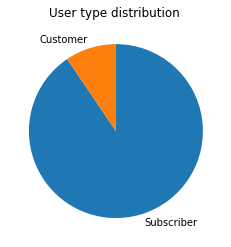

In [19]:
#counting the values of member_gender column 
usertype_count = fgb.user_type.value_counts()
usertype_count

#Plotting Pie chart for Gender_members distribution 
plt.pie(usertype_count, labels = usertype_count.index, startangle = 90, counterclock = False);
plt.title("User type distribution ") 
plt.show()

It shows that a large percentage of users are subscribers

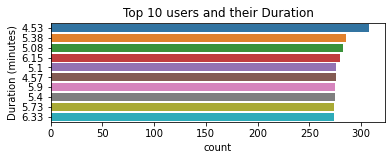

In [69]:
#plotting the top 10 Ride durations
plt.subplot(2,1,1)
sb.countplot(data=fgb , y= 'duration_in_minute',order=fgb.duration_in_minute.value_counts().iloc[:10].index)
xyt('count','Duration (minutes)','Top 10 users and their Duration')
plt.show()

This shows the bikes where taken on short distance rides the most.

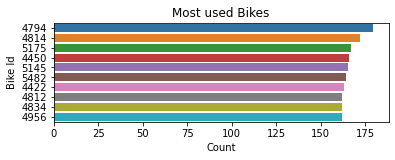

In [71]:
#plotting the top 10 bike Id  
plt.subplot(2,1,1) 
sb.countplot(data=fgb , y= 'bike_id',order=fgb.bike_id.value_counts().iloc[:10].index)
xyt('Count','Bike Id','Most used Bikes')
plt.show()

This chart is showing the top 10 bike id and this could help the maintenance department to conduct servicing at the appropriate time.

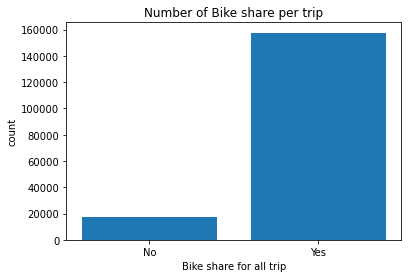

In [22]:
# Return the Series having unique values
x = fgb['bike_share_for_all_trip'].unique()

# Return the Series having frequency count of each unique value
y = fgb['bike_share_for_all_trip'].value_counts(sort=False)

plt.bar(x, y)

# Labeling the axes
xyt('Bike share for all trip','count', 'Number of Bike share per trip')

# Dsiplay the plot
plt.show()

Most users don't used Bike share for all trips.

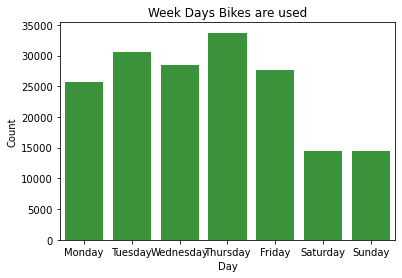

In [86]:
# declaring base_color
base_color = sb.color_palette()[2]

# Static-ordering the bars
sb.countplot(data=fgb, x='day', color=base_color);
# sb.countplot(data=fgb, x='day', color=base_color, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']);

freq = fgb['day'].value_counts()

# Get the indexes of the Series
gen_order = freq.index

sb.countplot(data=fgb, x='day', color=base_color);

xyt('Day','Count','Week Days Bikes are used')

This shows that rides where done on more during the week than on the weekends, with thursday as the day with the most use.


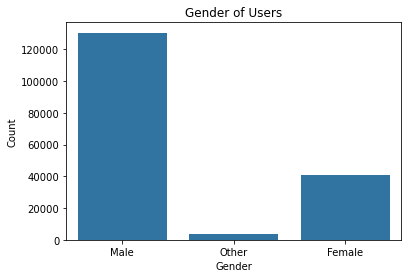

In [73]:
#using a countplot to view the gender distribution

default_color = sb.color_palette()[0]
sb.countplot(data = fgb, x = 'member_gender', color = default_color)
xyt('Gender','Count','Gender of Users')
plt.show()

Majority of our bike users are male.

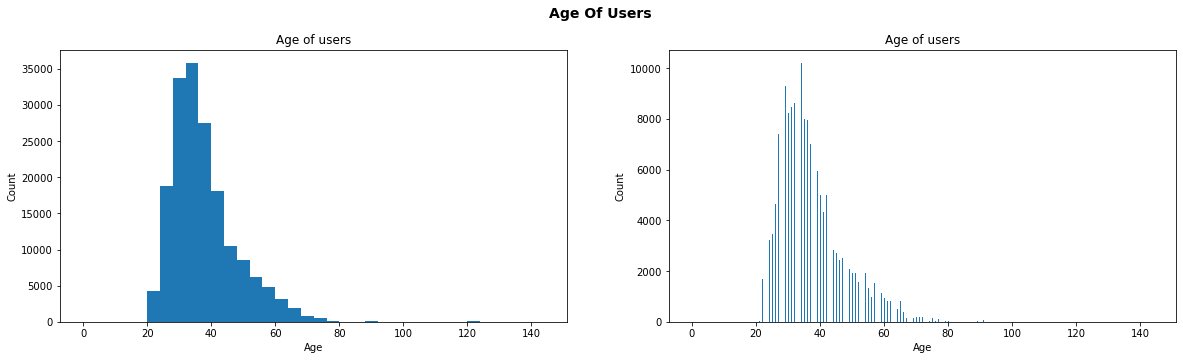

In [99]:
# using the histogram chat to show the age distribution 
plt.figure(figsize = [20, 5]) 

plt.subplot(1, 2, 1) 
bins = np.arange(0, fgb['age'].max()+4, 4)
plt.hist(data = fgb, x = 'age', bins = bins);
xyt('Age','Count','Age of users')

plt.subplot(1, 2, 2)
bins = np.arange(0, fgb['age'].max()+1/4, 1/4)
plt.hist(data = fgb, x = 'age', bins = bins);

plt.suptitle("Age Of Users".title(),y=1, fontsize = 14, weight = "bold");

xyt('Age','Count','Age of users')

users age range from 20 to 90 years old

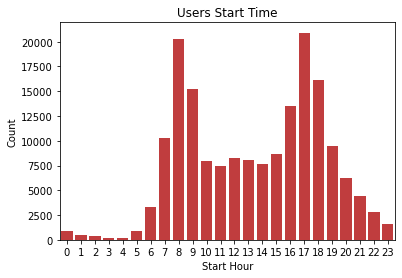

In [74]:
basic = sb.color_palette()[3]

# A semicolon (;) at the end of the statement will supress printing the plotting information
sb.countplot(data=fgb, x='start_hour', color= basic);
xyt('Start Hour','Count','Users Start Time')

Gobikes where used more be

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I had to read the start time and end time attributes in hours, and then looking at the dataset you see that we have male clients as our dominant users, and also the Higher number of subcribers.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Weekend frequency is low which would mean that users are mostly using the bike to go to work and come back from work as the hightest ride start time is 8am in the morning and 5pm in the evening.

## Bivariate Exploration

We will investigate the relationships between various pairs of variables, in this section, to try and answer the above question.

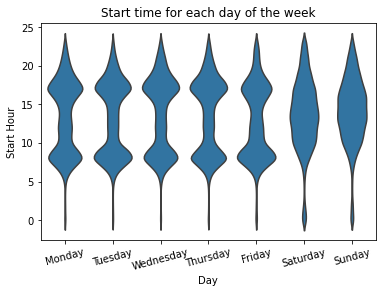

In [75]:
# comparing days of the week with start hour using Violin Plot

base_color = sb.color_palette()[0]

sb.violinplot(data= fgb, x='day', y='start_hour', color=base_color, inner=None)
plt.xticks(rotation=15);
xyt('Day','Start Hour','Start time for each day of the week')

The Violin plot shows longer distances covered on weekends

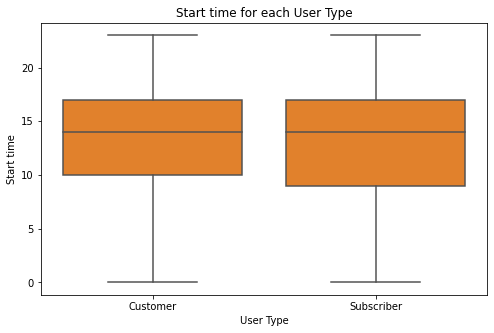

In [29]:
# We will be looking at the relationshipt between Gender and User type.
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = fgb, x = 'user_type', y = 'start_hour', color = base_color)
xyt('User Type', 'Start time', 'Start time for each User Type')

plt.show()

The average of the subscribers is slightly higher than that of the customers.

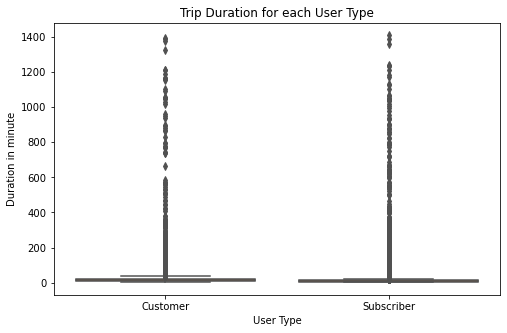

In [30]:
# We will be looking at the relationshipt between Gender and User type.
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = fgb, x = 'user_type', y = 'duration_in_minute', color = base_color)
xyt('User Type','Duration in minute', 'Trip Duration for each User Type')
plt.show()

A higher percentage of customers are taking longer trips.

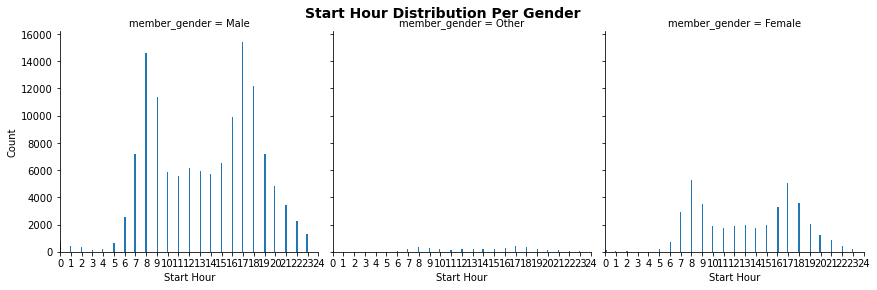

In [101]:
tick = list(range(25))
g = sb.FacetGrid(data = fgb, col = 'member_gender', col_wrap = 3, height = 4, xlim = [0,24])
g.map(plt.hist, 'start_hour', bins = 200)
plt.xticks(tick[::1])
g.set_xlabels('Start Hour')
g.set_ylabels('Count')
plt.suptitle("Start Hour Distribution Per Gender".title(),y=1, fontsize = 14, weight = "bold");
plt.show()

The heated points are 8am and 5pm, which mean those are the hours people use the bike the most.

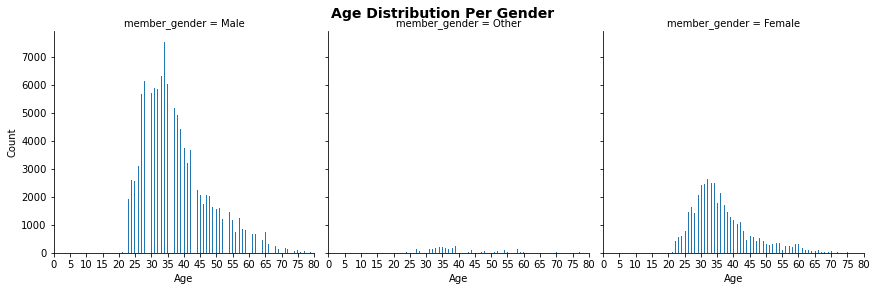

In [100]:
tick = list(range(81))
g = sb.FacetGrid(data = fgb, col = 'member_gender', height = 4)
g.map(plt.hist, 'age', bins = 400)
plt.xlim((0,80))
plt.xticks(tick[::5])
g.set_xlabels('Age')
g.set_ylabels('Count')
plt.suptitle("Age Distribution Per Gender".title(),y=1, fontsize = 14, weight = "bold");
plt.show()


This shows we have alot of men between the ages of 25 to 40 and women between the ages of 28 to 35.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Rides during the weekend are longer in comparison to weekdays. We have users in the age range of 20 to 80 years of age for men and then 28 to 65 years of age for females.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The oldest users in terms of age are male. And a higher portion of males are going the distance.

## Multivariate Exploration


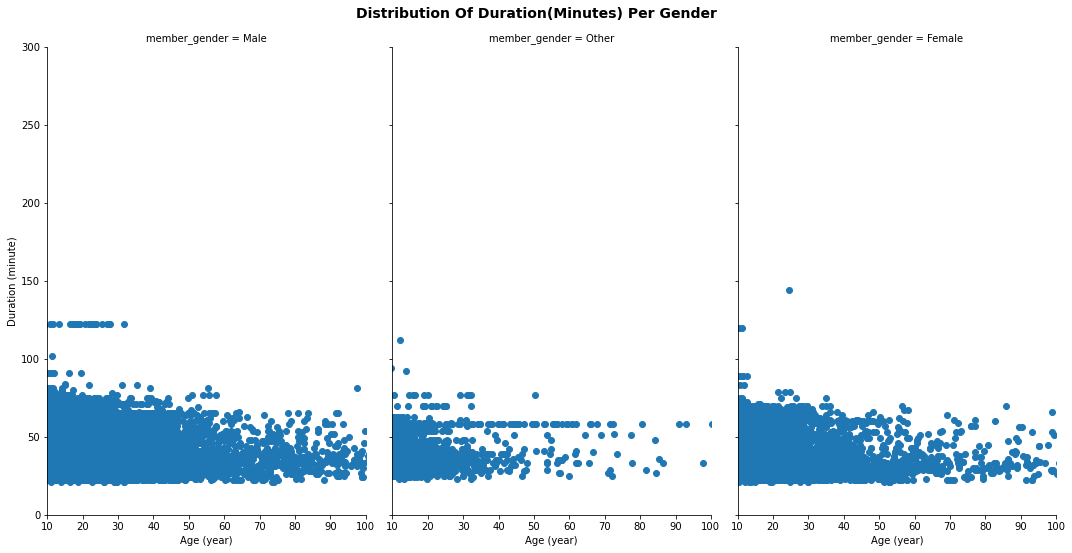

In [96]:
# relationship between Gender, Age and Duration
g = sb.FacetGrid(data = fgb, col = 'member_gender', col_wrap = 3, height = 5, xlim = [10,100], ylim = [0, 300])
g.map(plt.scatter, 'duration_in_minute', 'age')
g.fig.set_size_inches(15, 8);
g.set_xlabels('Age (year)')
g.set_ylabels('Duration (minute)')
plt.suptitle("Distribution of Duration(minutes) Per Gender".title(),y=1, fontsize = 14, weight = "bold");
plt.show()

This shows that majority of females covered shorter distances and those from ages 20 - 45 are the most active users.|

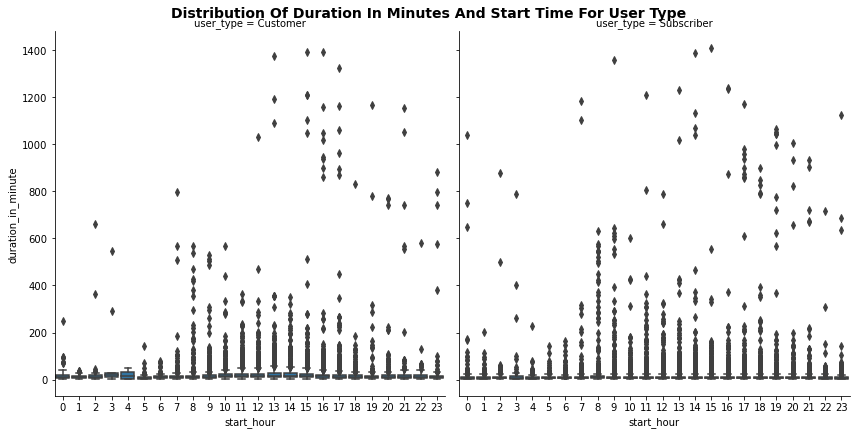

In [95]:
g = sb.FacetGrid(data = fgb, col = 'user_type', height = 6)
g.map(sb.boxplot, 'start_hour', 'duration_in_minute', order= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.suptitle("Distribution of Duration in minutes and Start Time for USER TYPE".title(),y=1, fontsize = 14, weight = "bold");

Customer type users had more rides in the evenings than they did during the day. 8am remains the dominant time.

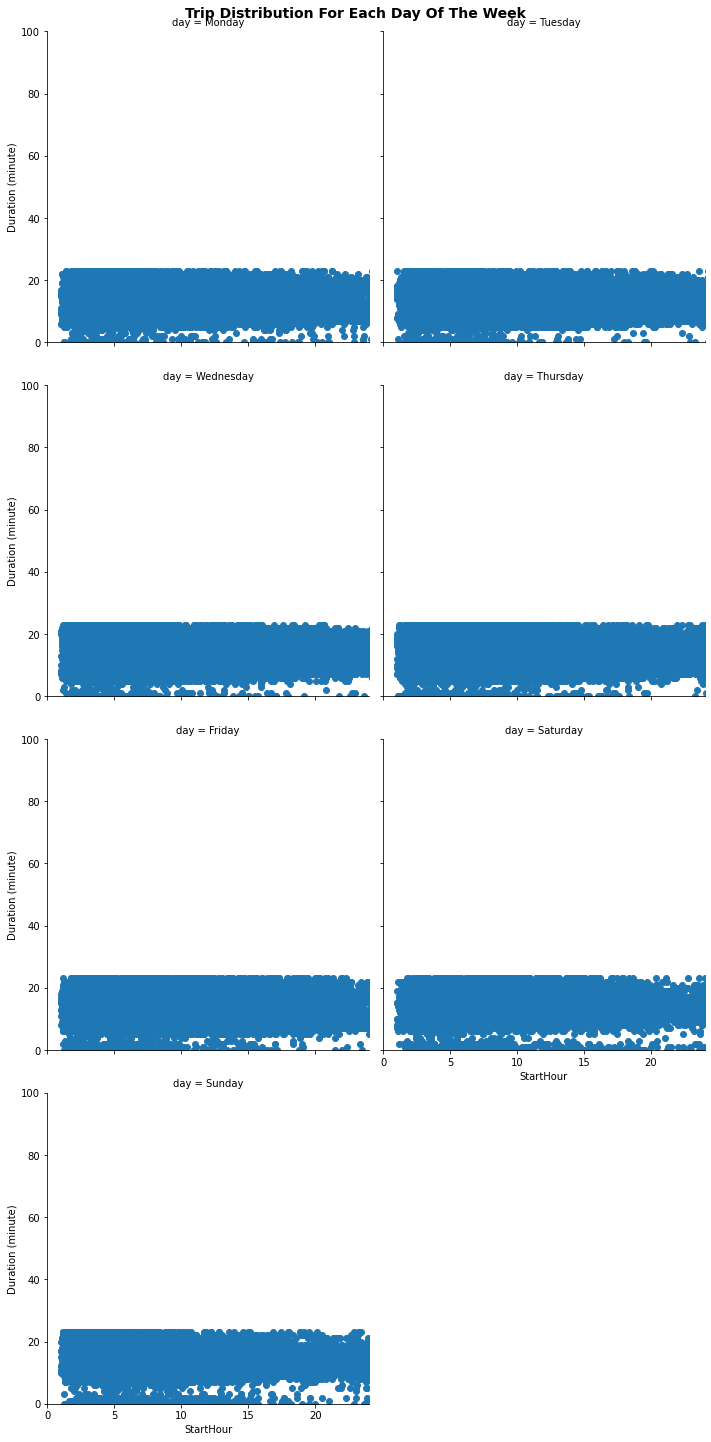

In [94]:
g = sb.FacetGrid(data = fgb, col = 'day', col_wrap = 2, height = 5, xlim = [0,24], ylim = [0, 100])
g.map(plt.scatter, 'duration_in_minute', 'start_hour')
g.set_axis_labels(x_var="StartHour", y_var="Duration (minute)")
plt.suptitle("Trip Distribution For each Day of the Week".title(),y=1, fontsize = 14, weight = "bold");
plt.show()

The riders clearly cover longer distances on weekends. Most rides long distance rides start in the evenings.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Most rides where done for a few minutes, leaving long distances for evenings and mostly weekends. Males clients are the oldest and dominant users of the service.

### Were there any interesting or surprising interactions between features?

the average of duration of casual users was higher on weekends than the rest of the days unlike the subscribers the duration distribution is uniform all week. that was intersting .